# Teorija grafova #

### Uvod ###

**Teorija grafova** jedna je od grana matematike koja nalazi veliku primjenu na području mreža računala, primjerice na
područjima algoritmama usmjeravenja, traženja puteva kroz mrežu te opisivanju topologije mreže.

**Jednostavan graf** G sastoji se od nepraznog konačnog skupa V(G) čije elemente zovemo **vrhovi** i konačnog skupa E(G) različitih parova elemenata V(G) koje zovemo **bridovi**.

Primjer jednostavnog grafa sa 5 vrhova (a, b, c, d, e) i 6 bridova (ab, bc, cd, bd, ce, be):

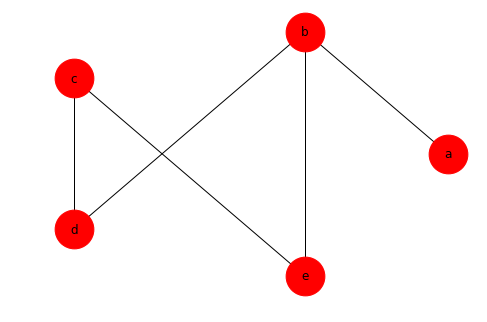

In [304]:
import networkx as nx
import matplotlib.pyplot as plt

g=nx.Graph()
g.add_edge('a','b') 
g.add_edge('c','d')
g.add_edge('b','d')
g.add_edge('c','e')
g.add_edge('b','e')

pos = nx.circular_layout(g)
nx.draw(g, pos, node_size=1500, with_labels=True, node_color='r')
plt.show()

Za vrhove u i v kažemo da su **susjedni vrhovi** ako postoji brid e=uv koji ih spaja. Za bridove e i f kažemo da su **susjedni bridovi** ako postoji vrh u tom grafu koji im je zajednički.

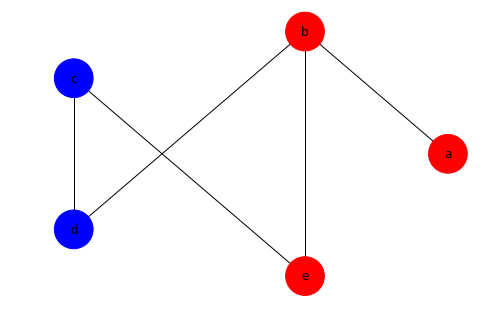

In [305]:
val_map = {'a': 'red',
           'b': 'red',
           'c': 'blue',
           'd': 'blue',
           'e': 'red'}

values = [val_map.get(node) for node in g.nodes()]

nx.draw(g, pos, node_color=values, node_size=1500, with_labels=True)
plt.show()

**Put u grafu** G je konačan slijed bridova v<sub>1</sub>v<sub>2</sub>...v<sub>n</sub> u kojemu su svaka dva brida susjedna i svi vrhovi različiti osim eventualno početnog i krajnjeg.

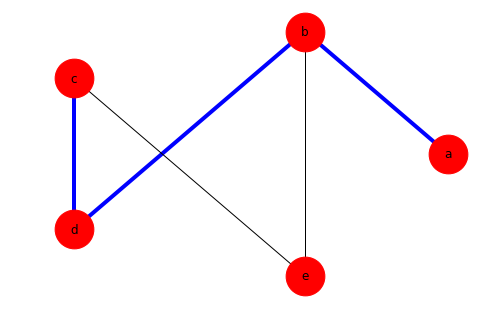

In [306]:
g=nx.Graph()
g.add_edge('a','b', boja='b', debljina=4) 
g.add_edge('c','d', boja='b', debljina=4)
g.add_edge('b','d', boja='b', debljina=4)
g.add_edge('c','e', boja='black', debljina=1)
g.add_edge('b','e', boja='black', debljina=1)

edges = g.edges()
boje = [g[u][v]['boja'] for u,v in edges]
debljine = [g[u][v]['debljina'] for u,v in edges]

pos = nx.circular_layout(g)
nx.draw(g, pos, edge_color=boje, width=debljine, node_size=1500, with_labels=True)

Za graf G kažemo da je **povezan** ako i samo ako postoji put između svaka dva vrha, u suprotnom kažemo da je **nepovezan**. Graf koji smo do sada koristili je primjer povezanog grafa.

Primjer nepovezanog grafa:

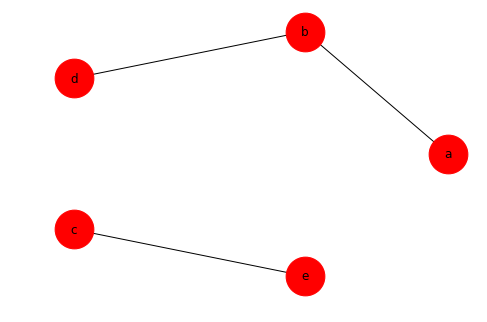

In [163]:
g=nx.Graph()
g.add_edge('a','b') 
g.add_edge('b','d')
g.add_edge('c','e')

pos = nx.circular_layout(g)
nx.draw(g, pos, node_size=1500, with_labels=True, node_color='r')
plt.show()

U praksi se često javlja potreba da svakom bridu e grafa G pridružimo realan broj w(e) koji zovemo **težina brida** e. Takav graf zovemo **težinski graf**. Tako npr. vrhovi grafa mogu predstavljati gradove, a težine bridova udaljenosti među tim gradovima ili troškove cestarine.

{('a', 'b'): Text(0.654508,0.475528,'5'),
 ('b', 'd'): Text(-0.25,0.181636,'6'),
 ('b', 'e'): Text(0.309017,5.36442e-08,'4'),
 ('c', 'd'): Text(-0.809017,-6.55651e-08,'3'),
 ('c', 'e'): Text(-0.25,-0.181636,'1')}

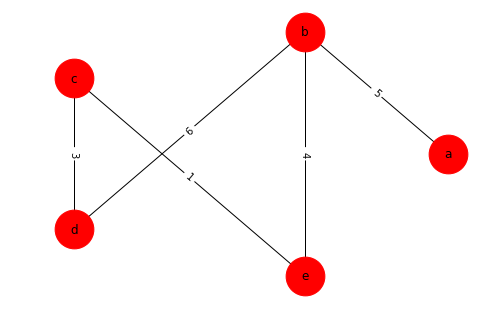

In [307]:
g=nx.Graph()
g.add_edge('a','b', weight=5) 
g.add_edge('c','d', weight=3)
g.add_edge('b','d', weight=6)
g.add_edge('c','e', weight=1)
g.add_edge('b','e', weight=4)

nx.draw(g,pos,node_size=1500, with_labels=True, node_color='r')
labels = nx.get_edge_attributes(g,'weight')
nx.draw_networkx_edge_labels(g,pos,edge_labels=labels)

Najjednostavniji način prikazivanja takvih grafova je **matricom incidencije**. To je matrica u kojoj se na mjestu *ij* nalazi težina brida *ij*. Za vrhove koji nisu povezani stavljamo nulu.

Sljedeća matrica incidencije odgovara gornjem težinskom grafu:

In [308]:
print("   Brid:\tTežina:")
print(nx.adjacency_matrix(g))
print('\n')
print("Matrica:")
print(nx.to_numpy_matrix(g))

   Brid:	Težina:
  (0, 1)	5
  (1, 0)	5
  (1, 3)	6
  (1, 4)	4
  (2, 3)	3
  (2, 4)	1
  (3, 1)	6
  (3, 2)	3
  (4, 1)	4
  (4, 2)	1


Matrica:
[[0. 5. 0. 0. 0.]
 [5. 0. 0. 6. 4.]
 [0. 0. 0. 3. 1.]
 [0. 6. 3. 0. 0.]
 [0. 4. 1. 0. 0.]]


## Obilasci grafa ##

Obilazak ili **pretraživanje grafa** je sistematičan prolazak njegovim bridovima kako bi se obišli svi njegovi vrhovi ili našao put do određenog vrha. Dva najčešća algoritma za pretraživanje grafova su **pretraživanje u širinu** i **pretraživanje u dubinu**.

### Pretraživanje u širinu ###

Za zadani graf *G = (V, E)* i početni vrh *s* sistematčno pretražujemo bridove grafa *G* kako bismo otkrili sve vrhove dostupne iz *s*. Ideja je da se iz vrha *s* prvo posjete svi susjedi.

Pogledajno na primjeru našeg grafa kojim se redom obilaze vrhovi, ako krenemo iz vrha 'a'.

In [309]:
def bfs(graph, start):
   explored = []
   queue = [start]
   while queue:
       node = queue.pop(0)
       if node not in explored:
           explored.append(node)
           neighbours = graph[node]

           for neighbour in neighbours:
               queue.append(neighbour)
   return explored

g=nx.Graph()
g.add_edge('a','b') 
g.add_edge('c','d')
g.add_edge('b','d')
g.add_edge('c','e')
g.add_edge('b','e')

print(bfs(g, 'a'))

['a', 'b', 'd', 'e', 'c']


Algoritam pretraživanja u širinu možemo koristiti za pronalazak puta između dva vrha grafa. Pogledajmo kako bi izgledao put od 'a' do 'e':

In [346]:
def bfs_put(graph, start, end):
    queue = []
    queue.append([start])
    while queue:
        path = queue.pop(0)
        node = path[-1]
        if node == end:
            return path
        for adjacent in graph[node]:
            new_path = list(path)
            new_path.append(adjacent)
            queue.append(new_path)

print (bfs_put(g, 'a', 'e'))

['a', 'b', 'e']


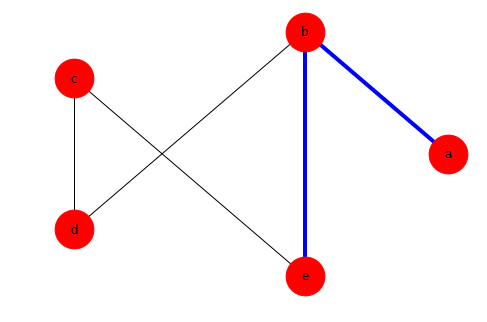

In [311]:
g=nx.Graph()
g.add_edge('a','b', boja='b', debljina=4) 
g.add_edge('c','d', boja='black', debljina=1)
g.add_edge('b','d', boja='black', debljina=1)
g.add_edge('c','e', boja='black', debljina=1)
g.add_edge('b','e', boja='b', debljina=4)

edges = g.edges()
boje = [g[u][v]['boja'] for u,v in edges]
debljine = [g[u][v]['debljina'] for u,v in edges]

pos = nx.circular_layout(g)
nx.draw(g, pos, edge_color=boje, width=debljine, node_size=1500, with_labels=True)

### Pretraživanje u dubinu ###

Drugi algoritam za obilazak je **pretraživanje u dubinu**. Ovaj algoritam također sistematično pronalazi sve vrhove, ali na nešto drugačiji način od pretraživanje u širinu. Naime, umjesto da se širi u grafu, on nastoji uvijek ići "dublje" u graf, tj. za svak susjedni vrh *v* vrha *u* pretraživanje u dubinu se rekurzivno poziva i provjerava susjede vrha *v* prije nego se vrati i provjeri preostale susjede vrha *u*. Pogledajmo kojim redom bi algoritam obišao vrhove ako počnemo iz vrha *a*.

In [349]:
g=nx.Graph()
g.add_edge('b','e')
g.add_edge('a','b') 
g.add_edge('c','d')
g.add_edge('b','d')
g.add_edge('c','e')


def dfs(graph, node, visited):
    if node not in visited:
        visited.append(node)
        for n in graph[node]:
            dfs(graph,n, visited)
    return visited

visited = dfs(g,'a',[])
print(visited)

['a', 'b', 'e', 'c', 'd']


Pomoću pretraživanja u dubinu nađimo put od 'a' do 'e' u našem grafu:

In [350]:
def dfs_put(graph, start, goal):
    stack = [(start, [start])]
    visited = set()
    while stack:
        (vertex, path) = stack.pop()
        if vertex not in visited:
            if vertex == goal:
                return path
            visited.add(vertex)
            for neighbor in graph[vertex]:
                stack.append((neighbor, path + [neighbor]))

print (dfs_put(g, 'a', 'e'))

['a', 'b', 'd', 'c', 'e']


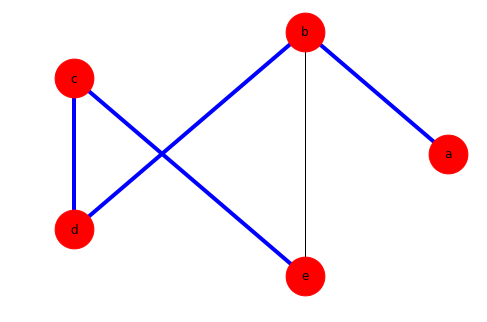

In [358]:
g=nx.Graph()
g.add_edge('a','b', boja='b', debljina=4) 
g.add_edge('c','d', boja='b', debljina=4)
g.add_edge('b','d', boja='b', debljina=4)
g.add_edge('c','e', boja='b', debljina=4)
g.add_edge('b','e', boja='black', debljina=1)

edges = g.edges()
boje = [g[u][v]['boja'] for u,v in edges]
debljine = [g[u][v]['debljina'] for u,v in edges]

pos = nx.circular_layout(g)
nx.draw(g, pos, edge_color=boje, width=debljine, node_size=1500, with_labels=True)

### Usporedba algoritama ###

In [374]:
import pandas as pd
dc = pd.DataFrame({'Algoritam' : ['BFS', 'DFS'],
                   'Prostorna složenost' : [r'$O(b^d)$', r'$O(bm)$'],
                   'Vremenska složenost' : [r'$O(b^d)$', r'$O(b^m)$'],
                   'Potpunost' : ['DA', 'NE'],
                   'Optimalnost' :['DA', 'NE']})
dc.set_index('Algoritam', inplace=True)
dc

,Optimalnost,Potpunost,Prostorna složenost,Vremenska složenost
Algoritam,,,,
BFS,DA,DA,$O(b^d)$,$O(b^d)$
DFS,NE,NE,$O(bm)$,$O(b^m)$


Gdje je:
* b - faktor grananja
* d - dubina optimalnog rješenja + 1
* m - maksimalna dubina stabla

**Zaključak**: Oba algoritma su eksponencijalne vremenske složenosti. Pretraživanje u dubinu bolje je prostorne složenosti od pretraživanja u širinu, ali nedostatak je što pretraživanje u dubinu ne daje optimalan rezultat i nije potpuno.